In [16]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
import sys
from collections import defaultdict
from os.path import join as oj

import matplotlib as mpl
import matplotlib.pyplot as plt

from simulations_util import *

sys.path.append('../../')
from viz import *
import viz

out_dir = f'results/linear_model'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

n_train = np.array([100, 250, 500, 750, 1000, 1500])  # 1500,2000,2500]
n_test = 500
d = 50
beta = 1
sigma = 0.1
sparsity = [10] #, 20]
n_avg = 5

# keys end up being saps, cart, rf
scores = defaultdict(list)
error_bar = defaultdict(list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# plot results

In [12]:
!ls {out_dir}

scores_0.pkl


In [20]:
(scores, error_bar) = pkl.load(open(oj(out_dir, 'scores_0.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    for i in range(len(sparsity)):
        best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k][i])))

In [21]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'SAPS': 'black',
    'CART': 'orange',
    'RF': cg
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

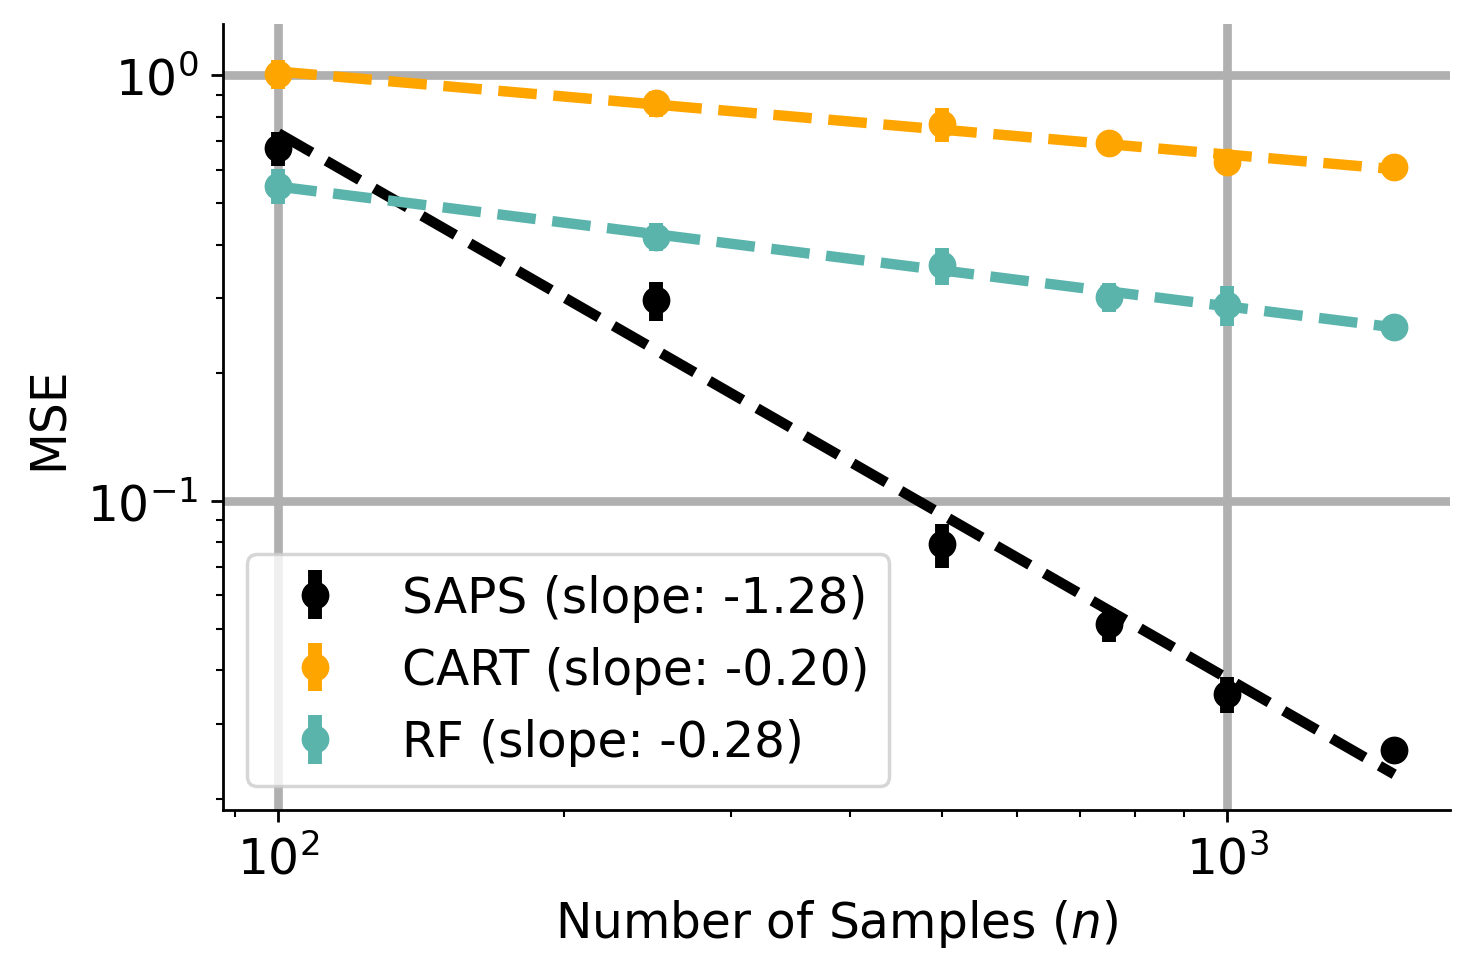

In [23]:
for num in range(len(sparsity)):
    sum_squares_fig, axs = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)
    axs = [axs]

    for i, k in enumerate(scores.keys()):
        kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
        slope = best_fits[k][num][0]
        axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][num][1]), linestyle='--', **kwargs)
        axs[0].errorbar(n_train, scores[k][num], yerr=error_bar[k][num], fmt='o', label=k + f' (slope: {slope:.2f})',
                        **kwargs)

    titles = ['Sparsity ($s$) = 10', 'Sparsity ($s$) = 20']
    for i in range(1):
        axs[i].legend(loc='best')  #, labelcolor='linecolor')
        axs[i].set_xlabel('Number of Samples ($n$)')  #, fontsize=25)
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        #     axs[i].set_title(titles[i])
        axs[i].grid()
        axs[i].set_yticks([0.1, 0.2, 0.5, 1.0])
    axs[0].set_ylabel('MSE')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)
    plt.yscale('log')
    plt.xscale('log')
    labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',
              r'$3 \times \mathregular{10^{0}}$']

    # plt.yticks(ytick, labels)
    viz.savefig(f'err_rate_{num}_linear')
    plt.show()